# 함수 근사 관찰을 위한 신경망의 학습 구현

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from utils.function_time import logging_time

## 신경망 구현

In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # 총 4개의 hidden layer를 가진 NN
        self.fc1 = nn.Linear(1, 128) # 1 input, 128 features(nodes)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False) # 128 inputs, 1 output

    def forward(self, x): # 위의 모델을 이용하여 실제로 연산할 때 호출되는 함수
        x = F.relu(self.fc1(x)) # activation function으로 ReLU를 사용
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

## 인풋 데이터 생성

F(x) = cos(1.5pi * x) + x + e (e~U(-0.2,0.2)) 

In [9]:
def true_fun(X):
    noise = np.random.rand(X.shape[0]) * 0.4 - 0.2
    return np.cos(1.5 * np.pi * X) + X + noise

## 학습 결과 시각화

In [10]:

def plot_results(model):
    x = np.linspace(0, 5, 100)
    input_x = torch.from_numpy(x).float().unsqueeze(1)
    plt.plot(x, true_fun(x), label="Truth")
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right', fontsize=15)
    plt.xlim((0, 5))
    plt.ylim((-1, 5))
    plt.grid()
    plt.show()

## 신경망 학습

In [15]:
@logging_time
def main():
    data_x = np.random.rand(10000) * 5 # 0~5 사이 숫자 1만개를 샘플링하여 인풋으로 사용
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for step in range(10000): # 1만번 파라미터 업데이트
        batch_x = np.random.choice(data_x, 32) # 랜덤하게 뽑힌 32개의 데이터로 mini-batch를 구성
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1) # 인풋 데이터를 torch tensor로 변환
        pred = model(batch_x_tensor) # 모델에 인풋을 넣어서 예측값을 계산

        batch_y = true_fun(batch_x) # 실제 값을 계산
        truth = torch.from_numpy(batch_y).float().unsqueeze(1) # 실제 값을 torch tensor로 변환

        loss = F.mse_loss(pred, truth) # 손실 함수인 MSE를 사용하여 loss를 계산

        optimizer.zero_grad() # 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화
        loss.mean().backward() # 역전파를 통한 그라이언트 계산이 일어나는 부분
        optimizer.step() # 실제로 파라미터를 업데이트하는 부분

    plot_results(model)
    print("Train MSE: {}".format(loss.mean().item()))

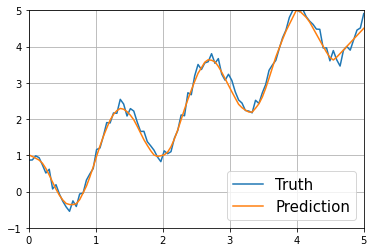

Train MSE: 0.01703920029103756
Running Time[main]: 7.71068335 sec


In [16]:
if __name__ == '__main__':
    main()